In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [16]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(len(x_train))
print(len(x_test))

60000
10000


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

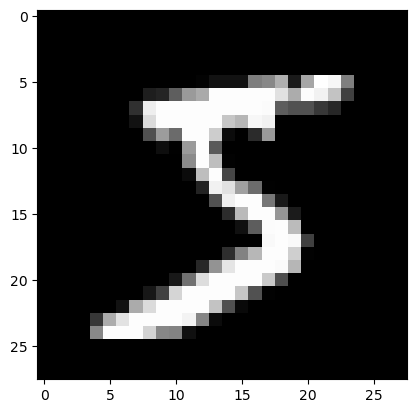

In [5]:
plt.imshow(x_train[0],cmap="gray")

In [6]:
print(y_train[0])

5


In [74]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras import Model

In [19]:
class MNISTModel(Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu')
        self.flatten = Flatten()
        self.dense1 = Dense(128, activation='relu')
        self.dense2 = Dense(10, activation='softmax')
        
    def call(self, x):
        x1 = self.con1(x)
        x2 = self.flatten(x1)
        x3 = self.dense(x2)
        return self.dense2(x3)
    
model = MNISTModel()

# Conv2D(filters= 32, kernal_size = 3, activation='relu')
# Flatten()
# Dense(neurons= 128, activation='softmax')

In [20]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [21]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

In [22]:
test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [23]:
@tf.function
def train_step(inputs, outputs):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = loss_function(outputs, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_graidients(zip(graidients,model.trainable_variables))
    
    train_loss(loss)
    train_accuracy(outputs, predictions)

In [24]:
@tf.function
def test_step(inputs, outputs):
    predictions = model(inputs)
    loss = loss_function(outputs, predictions)
    
    test_loss(loss)
    test_accuracy(outputs, predictions)

In [17]:
x_train, x_test = x_train /255.0, x_test / 255.0

x_train = x_train[...,tf.newaxis]
x_test= x_test[...,tf.newaxis]

In [15]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [42]:
train_data = tf.data.Dataset.from_tensor_slices(
    (x_train,y_train)).shuffle(10000).batch(32)

test_data = tf.data.Dataset.from_tensor_slices(
    (x_test, y_test)).batch(32)

In [64]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras import Model

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

train_data = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)
test_data = tf.data.Dataset.from_tensor_slices(
    (x_test, y_test)).batch(32)

class MNISTModel(Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu')
        self.flatten = Flatten()
        self.dense1 = Dense(128, activation='relu')
        self.dense2 = Dense(10, activation='softmax')

    def call(self, x):
        x1 = self.conv1(x)
        x2 = self.flatten(x1)
        x3 = self.dense1(x2)
        return self.dense2(x3)
    
model = MNISTModel()

loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

@tf.function
def train_step(inputs, outputs):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = loss_function(outputs, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    train_loss(loss)
    train_accuracy(outputs, predictions)
    
@tf.function
def test_step(inputs, outputs):
    predictions = model(inputs)
    loss = loss_function(outputs, predictions)
    
    test_loss(loss)
    test_accuracy(outputs, predictions)
    
epochs = 5

for epoch in range(epochs):
    for train_inputs, train_labels in train_data:
        train_step(train_inputs, train_labels)
        
    for test_inputs, test_labels in test_data:
        test_step(test_inputs, test_labels)
        
    template = 'Epochs: {}, Train loss: {}, Train accuracy: {}, Test loss: {} Test accuracy: {}'
    print(template.format(
        epoch + 1,
        train_loss.result(),
        train_accuracy.result(),
        test_loss.result(),
        test_accuracy.result(),
    ))
    
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

Epochs: 1, Train loss: 0.14061042666435242, Train accuracy: 0.9573166370391846, Test loss: 0.061942774802446365 Test accuracy: 0.9797000288963318
Epochs: 2, Train loss: 0.04342050477862358, Train accuracy: 0.9869499802589417, Test loss: 0.05933140218257904 Test accuracy: 0.9814000129699707
Epochs: 3, Train loss: 0.024963492527604103, Train accuracy: 0.9921333193778992, Test loss: 0.058500148355960846 Test accuracy: 0.9832000136375427
Epochs: 4, Train loss: 0.014653160236775875, Train accuracy: 0.9954166412353516, Test loss: 0.06080912798643112 Test accuracy: 0.9815999865531921
Epochs: 5, Train loss: 0.009950845502316952, Train accuracy: 0.9963499903678894, Test loss: 0.06499332189559937 Test accuracy: 0.9835000038146973


In [31]:
from random import *